# Assignment 3 - Deep Learning

### First importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model

Using TensorFlow backend.


#### This assignment was performed on Google Collab, hence we first need to mount Google Drive, then navigate to the same folder to import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [0]:
dfX = pd.read_pickle('trainX.pickle')
dfy = pd.read_pickle('trainY.pickle')

#### After importing the image, I displayed the first image of the dataset using plt.imshow()

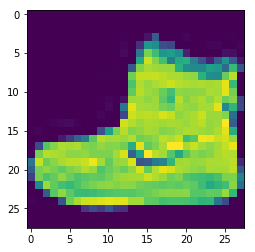

In [25]:
plt.imshow(dfX[0])

#### Looking at the format of the output data

In [28]:
dfy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Creating the test and validation data, and reshaping it for input into the convolutional network

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2)

In [0]:
img_cols, img_rows = 28, 28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (img_rows, img_cols, 1)

### Setting up the convolutional network

In [0]:
batch_size = 128
num_classes = 10
epochs = 30

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Description of the Layers

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important. Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.4

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', 
                 input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), name = "MAXPOOL_2"))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(10, activation = "softmax"))

optimizer = adam(lr = 0.001, epsilon = 1e-08, decay = 0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

W0623 03:29:49.108489 140389988878208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 03:29:49.123001 140389988878208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 03:29:49.126138 140389988878208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 03:29:49.152483 140389988878208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0623 03:29:49.153495 1403899888

#### Fitting the model on the training and validation data

In [13]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 320s 7ms/step - loss: 0.1102 - acc: 0.9591 - val_loss: 0.2046 - val_acc: 0.9311
Epoch 2/30
48000/48000 [==============================] - 317s 7ms/step - loss: 0.1061 - acc: 0.9607 - val_loss: 0.2201 - val_acc: 0.9287
Epoch 3/30
48000/48000 [==============================] - 318s 7ms/step - loss: 0.1024 - acc: 0.9617 - val_loss: 0.2074 - val_acc: 0.9313
Epoch 4/30
48000/48000 [==============================] - 332s 7ms/step - loss: 0.0944 - acc: 0.9647 - val_loss: 0.2105 - val_acc: 0.9346
Epoch 5/30
48000/48000 [==============================] - 323s 7ms/step - loss: 0.0908 - acc: 0.9659 - val_loss: 0.2093 - val_acc: 0.9353
Epoch 6/30
48000/48000 [==============================] - 322s 7ms/step - loss: 0.0862 - acc: 0.9678 - val_loss: 0.2304 - val_acc: 0.9332
Epoch 7/30
48000/48000 [==============================] - 320s 7ms/step - loss: 0.0832 - acc: 0.9684 - val_loss: 0.2310 - 

### Saving the model

The model is saved as model.json

The weights are saved in model.h5

In [0]:
from keras.models import model_from_json
model_json = model.to_json()

In [15]:
!ls

testX.pickle  trainX.pickle  trainY.pickle


In [0]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights("model.h5")

### Making predictions on training data

#### The output dataframe, 'predictions' is saved in text format in `textPredictions.txt` and in pickle format in `testy.pickle`

In [0]:
testX = pd.read_pickle('testX.pickle')
testX = testX.reshape(testX.shape[0], 28, 28, 1)


In [0]:
predictions = model.predict(testX)

In [22]:
predictions.shape

(10000, 10)

In [0]:
testResults = np.argmax(predictions, axis = 1)
np.savetxt('testPredictions.txt', testResults)

In [0]:
import pickle

with open('testy.pickle', 'wb') as handle:
    pickle.dump(testResults, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
!ls

model.h5  model.json  testX.pickle  testy.pickle  trainX.pickle  trainY.pickle
